<a href="https://colab.research.google.com/github/stormA4ka/hw/blob/master/Copy_of_%D0%9D%D0%BE%D1%8F%D0%B1%D1%80%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%83%D1%80%D1%81_Pro_%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_1_%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%80%D1%83%D0%BA%D0%BE%D0%BF%D0%B8%D1%81%D0%BD%D1%8B%D1%85_%D1%86%D0%B8%D1%84%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознавание рукописных цифр из набора данных MNIST с помощью Keras

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [2]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential #НС прямого распространения
from tensorflow.keras.layers import Dense #Полносвязные слой
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных с рукописными цифрами**

In [3]:
#Загрузка данных Mnist
#x_train_org - входные картинки, обучающая выбрка
#y_train_org - выходные индексы, обучающая выборка
#x_test_org - входные картинки, тестовая выбрка
#y_test_org - выходные индексы, тестовая выборка
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


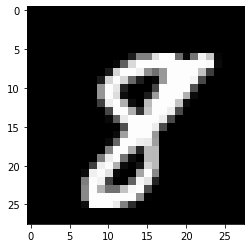

In [4]:
n = 55 #Номер картинки

#Отрисовка картинки
#Image.fromarray - создание картинки по массиву
#.convert('RGBA') - преобразование в RGBA формат
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGBA'))
plt.show()

**Преобразование размерности данных в наборе**

In [0]:
#Меняем формат входных картинок с 28х28 на 784х1
#Это нужно для удобства работы с полносвязным слоем (Dense)
#С двумерной картинкой мы будем работать в будущем с помощью свёрточных сетей
#Функция .reshape меняет размер массива
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

**Нормализация данных**

In [0]:
#Нормализуем входные картинки
#НС лучше работают, если данные нормаваны от 0 до 1
#Сейчас значения во входных картинках от 0 до 255
#Надо разделить картинки на 255
#И сначала преобразовать картинки в тип float (цифры с плавающей точкой)
x_train = x_train.astype('float32') / 255
#x_train = x_train / 255
x_test = x_test.astype('float32') / 255
#x_test = x_test / 255

**Работа с правильными ответами**

In [8]:
#Выводим пример индекса в выходных данных
print(y_train_org[n])

8


**Преобразуем метки в формат one hot encoding**

In [0]:
#НС сложно работать с чистыми индексами от 0 до 9
#Ей проще работать с данными в формате one hot encoding
#Это формат из 10 цифр - все 0 и одна 1 там, где правильный ответ
#Например
#Индекс 0 - это [1 0 0 0 0 0 0 0 0 0]
#Индекс 2 - это [0 0 1 0 0 0 0 0 0 0]
#Индекс 9 - это [0 0 0 0 0 0 0 0 0 1]
#Это делается функцией utils.to_categorical()
#Второй параметр - это количество классов, у нас - 10
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

**Правильный ответ в формате one hot encoding**

In [11]:
#Выводим размер y_train
#60 тысяч примеров, каждый размера 10 (так как 10 классов)
print(y_train.shape)

(60000, 10)


In [12]:
#Выводим пример одного выходного вектора
print(y_train[n])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [0]:
#Создаём сеть прямого распространения
#Пока она пустая
#Подробнее на https://keras.io/models/sequential/
model = Sequential()

**Добавляем уровни сети**


In [14]:
#Добавляем в сеть полносвязные слои
#Dense - полносвязный слой, подробнее на https://keras.io/layers/core/
#Первый парамерт - количество нейронок, обычно от 2 до 2000, подбирается в ходе исследования
#input_dim - размер входного вектора, указывается только в первом слое сети
#activation - активационная функция нейронов данного слоя
#relu - одна из активационных функций, подробнее на https://keras.io/activations/
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(400, activation="relu"))

#Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
#activation="softmax" - активационная функция, 
#которая делает сумму всех значений нейронов слой, равной 1
#Подробнее https://keras.io/activations/
model.add(Dense(10, activation="softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


**Компилируем сеть**

In [15]:
#Нейронку надо "скомпилировать"
#При компиляции мы задаём несколько параметров
#loss - функция ошибки, которую оптимизирует сеть
#categorical_crossentropy - одна из функций ошибки, подходящая для классификации нескольких классов, подробнее https://keras.io/activations/
#optimizer - алгоритм обучения НС
#adam - один из алгоритмов обучения НС, подробнее https://keras.io/optimizers/
#metrics - метрика качества обучения, измеряется после каждой эпохи обучения
#accuracy - метрика, процент правильно распознанных примеров, подробнее https://keras.io/metrics/
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Вывод структуры нейронки
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [16]:
#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка, перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выбрки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
#validation_split - процент данных, на которых сеть не обучается, на которых мы измеряем точность распознавания
model.fit(x_train, y_train, batch_size=128, epochs=30, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 3s 56us/sample - loss: 0.2306 - acc: 0.9323 - val_loss: 0.1091 - val_acc: 0.9672
Epoch 2/30
48000/48000 [==============================] - 1s 23us/sample - loss: 0.0823 - acc: 0.9741 - val_loss: 0.1013 - val_acc: 0.9686
Epoch 3/30
48000/48000 [==============================] - 1s 22us/sample - loss: 0.0514 - acc: 0.9836 - val_loss: 0.0835 - val_acc: 0.9746
Epoch 4/30
48000/48000 [==============================] - 1s 22us/sample - loss: 0.0338 - acc: 0.9893 - val_loss: 0.0913 - val_acc: 0.9742
Epoch 5/30
48000/48000 [==============================] - 1s 23us/sample - loss: 0.0258 - acc: 0.9916 - val_loss: 0.0838 - val_acc: 0.9772
Epoch 6/30
48000/48000 [==============================] - 1s 23us/sample - loss: 0.0220 - acc: 0.9928 - val_loss: 0.0972 - val_acc: 0.9767
Epoch 7/30
48000/48000 [==============================] - 1s 23us/sample - loss: 0.0185 - acc: 0.9936 - val_loss: 0.

## Сохраняем обученную нейронную сеть

Записываем обученную нейронную сеть в файл `mnist_dense.h5`

In [0]:
#Сохраняем нейронку в файл
model.save("mnist_dense.h5")


Проверяем, что файл сохранился

In [18]:
#Выводим на экран список текущих файлов
!ls

mnist_dense.h5	sample_data


**Сохраняем файлы на локальный компьютер**

In [0]:
#Скачиваем файл локально на компьютер
files.download("mnist_dense.h5")

Если хотите использовать обученную нейронную сеть на своем компьютере:

```
from keras.models import load_model
model = load_model('mnist_dense.h5')
```

## Используем сеть для распознавания рукописных цифр

In [0]:
#Номер тестовой цифры, которую будем распознавать
n_rec = 1779

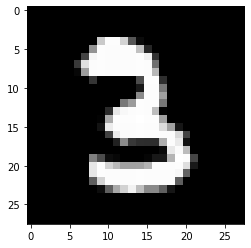

In [21]:
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show()

**Меняем размерность изображения и нормализуем его**

In [0]:
#Выбираем нужную картинку из тестовой выборки
x = x_test[n_rec]
#Добавляем одну размерность в конце, чтобы нейронка могла распознать пример
#Потому что нейронка принимает именно массов примеров для распознавания
#Мы делаем массив из одного примеры
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [0]:
#Распознаём ннаш пример
prediction = model.predict(x)

**Печатаем результаты распознавания**

In [24]:
#Выводим результат, это 10 цифр
#Сумма значений равна 1, так как финальный слой с активационной функций softmax
print(prediction)

[[1.1902880e-28 2.4297241e-18 2.0236881e-15 1.0000000e+00 1.8865837e-26
  5.2219009e-17 4.0448991e-31 1.0343009e-15 4.3407430e-20 4.8532118e-20]]


**Преобразуем результаты из формата one hot encoding**

In [25]:
#Получаем индекс самого большого элемента
#Это итоговая цифра, которую распознала сеть
prediction = np.argmax(prediction)
print(prediction)

3


**Печатаем правильный ответ**

In [26]:
#выводим правильный ответ, для сравнения
print(y_test_org[n_rec])

3


## Загружаем свою картинку

In [35]:
#Загружаем файл со своей рукописной цифрой
files.upload()

Saving 1.png to 1.png


{'1.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xbe\x00\x00\x01V\x08\x02\x00\x00\x00\x99\xf8oQ\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\x10\x01IDATx^\xed\xddO\x88WU\xff\xc0\xf1\xfa%$\xd2B\xc4\x85\xd0?\xe8\x9f\x03e\xcc"\x0c\x12I\xfa\x83\x1b\x17I\xc4\xb8\xb2\x19\x11\x12ra\x8b\x10!q(\tw\xcdV\xd0\x1c\x97\x81PK\x8d\t\xa4E\x98\xab\x81\xb0H\x03Q\x0b\xa4\xa4\x06\x82V\xd2\xfc.\xdd\xd3<\xdf\xc6\xf9w\xe6{\xcf\xb9\xf7~\xef\xeb\xb5\xe8\xb9gz\xb0\x16\x0f\xef\xe73\xf7\x9c{\xef\xfd\xb3\xb3\xb3\xf7\x01\x10\xe3\xff\xc2\x7f\x02\xb0b\xd2\t\x10M:\x01\xa2I\'@4\xe9\x04\x88&\x9d\x00\xd1\xa4\x13 \x9at\x02D\x93N\x80h\xd2\t\x10M:\x01\xa2I\'@4\xe9\x04\x88&\x9d\x00\xd1\xa4\x13 \x9at\x02D\x93N\x80h\xd2\t\x10M:\x01\xa2I\'@4\xe9\x04\x88&\x9d\x00\xd1\xa4\x13 \x9atB_.^\xbc\xf8\xc5\x17_\x84\x05\x9d!\x9d\xd0\x97"\x9d\xbbw\xef\x9e\x9c\x9c\x0ck\xbaA:a\x95N\x9d:\xb5g\xcf\x9eK\x97.\x15\xd7ccc\xe

Проверяем загрузку картинки

In [36]:
!ls

1.png  9.png  mnist_dense.h5  sample_data


Загружаем картинку из файла

In [0]:
#Указывает путь к файлу
img_path = '1.png'
#Загружаем картинку, меняем размер на 28х28, формат на оттенки серого
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Показываем картинку

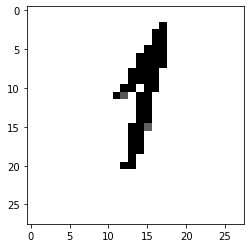

In [38]:
#Выводим картинку
plt.imshow(img.convert('RGBA'))
plt.show()

Преобразуем картинку для обработки нейронной сетью

In [0]:
#Преобразуем картинку в массив
x = image.img_to_array(img)
#Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
#Инвертируем изображение, нам надо белое на чёрном фоне
x = 255 - x
#Нормализуем изображение
x /= 255

Запускаем распознавание

In [0]:
#Распознаём картинку
prediction = model.predict(x)

Результаты распознавания

In [42]:
#Выводим результат
prediction

array([[1.3523850e-20, 1.0000000e+00, 4.2790847e-15, 1.6819176e-17,
        1.7669786e-15, 3.4795739e-23, 5.2832776e-23, 1.8670010e-13,
        3.6356771e-13, 4.4775561e-14]], dtype=float32)

In [43]:
#Выводим распознанную цифру
print(np.argmax(prediction))

1


#Функция быстрого теста сети

In [0]:
#Функция генерации нейронки
#neoronsL1 - нейронов в первом слое
#neuronsL2 - нейронов в втором слое, 0 - если не делать слой
#neuronsL3 - нейронов в третьем слое, 0 - если не делать слой
#innerActivation - активационная функция скрытых слоёв
#outputActivation - активационная функция выходного слоя
def createNet(neoronsL1, neuronsL2, neuronsL3, innerActivation, outputActivation):
  model = Sequential() #Создаём сеть
  model.add(Dense(neoronsL1, input_dim=784, activation=innerActivation)) #Добавляем первый слой
  
  #Если число второго слоя > 0
  #Создаём второй слой
  if (neuronsL2 > 0):
    model.add(Dense(neuronsL2, activation=innerActivation))
  
  #Если число третьего слоя > 0
  #Создаём третий слой
  if (neuronsL3 > 0):
    model.add(Dense(neuronsL3, activation=innerActivation))
    
  #Создаём выходной слой
  model.add(Dense(10, activation=outputActivation))
  
  #Компилируем сеть
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  
  #Возвращаем созданную сеть
  return model

#Обучаем и тестируем сеть
#Net - лист с 5 параметрами сети
#batch_size - размер батча
#epochs - число эпох обучения
#iterations - число запусков сети
def testModel(net, batch_size, epochs, iterations):
  acc = [] #Лист с точностями на проверочной выборке по каждому запуску
  
  #Запускаем iterations раз сеть
  for i in range(iterations):
    #Создаём сеть
    model = createNet(net[0], net[1], net[2], net[3], net[4])
    #Обучаем сеть
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_split=0.2)
    #Добавляем в лист точность на проверочной выборке на последней итерации
    acc.append(history.history["val_acc"][-1])
  
  #Возвращаем лист точностей
  return acc

In [46]:
#Запускаем тест одной нейронки 100 раз
acc = testModel([800,0,0,'relu','softmax'], 200, 10, 3)
print(acc)

[0.979, 0.97866666, 0.9795833]


In [47]:
#Отображаем результаты
print("Точность на всех запусках: ", [round(a,4) for a in acc])
print("Среднее значение точности: ", round(sum(acc)/len(acc), 4))
print("Амплитуда разброса точности: ", round(max(acc) - min(acc), 4))
print("Среднеквадратичное отклонение точности: ", round(np.array(acc).std(),6))

Точность на всех запусках:  [0.979, 0.9787, 0.9796]
Среднее значение точности:  0.9791
Амплитуда разброса точности:  0.0009
Среднеквадратичное отклонение точности:  0.000379


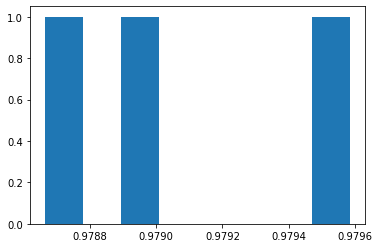

In [48]:
#Строим гистограмму точности сети
plt.hist(acc, 8)
plt.show()

**Генерируем и тестируем нейронки**

In [0]:
#Создаём 5 различных сетей
net = []
net.append([800, 0, 0, 'relu', 'softmax'])
net.append([400, 0, 0, 'relu', 'softmax'])
net.append([400, 400, 0, 'relu', 'softmax'])
net.append([800, 0, 0, 'relu', 'sigmoid'])
net.append([800, 0, 0, 'linear', 'softmax'])
net.append([400, 0, 0, 'relu', 'sigmoid'])
net.append([400, 400, 0, 'relu', 'sigmoid'])


In [53]:

#Обучаем каждую сеть и выводим среднюю точность на проверочной выборке по 3 запускам
for currNet in net:
  acc = testModel(currNet, 200, 10, 3)
  print(currNet, round(sum(acc)/len(acc),4))

[800, 0, 0, 'relu', 'softmax'] 0.979
[400, 0, 0, 'relu', 'softmax'] 0.9774
[400, 400, 0, 'relu', 'softmax'] 0.977
[800, 0, 0, 'relu', 'sigmoid'] 0.0995
[800, 0, 0, 'linear', 'softmax'] 0.9244
[400, 0, 0, 'relu', 'sigmoid'] 0.0995
[400, 400, 0, 'relu', 'sigmoid'] 0.0995
